In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/CesAlFem SIC/tepung2/comtrade (26).csv')
df2 = pd.read_csv('/content/drive/MyDrive/CesAlFem SIC/tepung2/comtrade (27).csv')
df3 = pd.read_csv('/content/drive/MyDrive/CesAlFem SIC/tepung2/comtrade (28).csv')
df4 = pd.read_csv('/content/drive/MyDrive/CesAlFem SIC/tepung2/comtrade (29).csv')

df5 = pd.read_csv('/content/drive/MyDrive/CesAlFem SIC/TEPUNG WORLD/comtrade (40).csv')
df6 = pd.read_csv('/content/drive/MyDrive/CesAlFem SIC/TEPUNG WORLD/comtrade (41).csv')
df7 = pd.read_csv('/content/drive/MyDrive/CesAlFem SIC/TEPUNG WORLD/comtrade (42).csv')
df8 = pd.read_csv('/content/drive/MyDrive/CesAlFem SIC/TEPUNG WORLD/comtrade (43).csv')


In [ ]:
df_all = df1.append([df2, df3, df4], ignore_index =True)


df_all2 = df5.append([df6, df7, df8], ignore_index =True)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Classification          90 non-null     object 
 1   Year                    90 non-null     int64  
 2   Period                  90 non-null     int64  
 3   Period Desc.            90 non-null     int64  
 4   Aggregate Level         90 non-null     int64  
 5   Is Leaf Code            90 non-null     int64  
 6   Trade Flow Code         90 non-null     int64  
 7   Trade Flow              90 non-null     object 
 8   Reporter Code           90 non-null     int64  
 9   Reporter                90 non-null     object 
 10  Reporter ISO            90 non-null     object 
 11  Partner Code            90 non-null     int64  
 12  Partner                 90 non-null     object 
 13  Partner ISO             90 non-null     object 
 14  2nd Partner Code        0 non-null      floa

In [ ]:
selected_columns = df_all[df_all.Partner == 'China'][['Partner','Year', 'Trade Value (US$)']]

df_sel_col = selected_columns.copy()

df_sel_col = df_sel_col.sort_values(by=['Year'])

df_sel_col

,Partner,Year,Trade Value (US$)
70,China,2001,48
78,China,2003,5675
49,China,2010,64250
44,China,2011,1594
25,China,2012,31091
34,China,2014,2700
39,China,2015,1
20,China,2016,7495
0,China,2017,17781
5,China,2018,492500


In [ ]:
df_sel_col = df_sel_col.merge(how='right', on='Year', right = pd.DataFrame({'Year':np.arange(2001, 2021, 1)}))

df_sel_col

,Partner,Year,Trade Value (US$)
0,China,2001,48.0
1,NaN,2002,NaN
2,China,2003,5675.0
3,NaN,2004,NaN
4,NaN,2005,NaN
5,NaN,2006,NaN
6,NaN,2007,NaN
7,NaN,2008,NaN
8,NaN,2009,NaN
9,China,2010,64250.0


In [ ]:
df_sel_col['Partner'] = df_sel_col['Partner'].fillna('China')

df_sel_col['Trade Value (US$)'] = df_sel_col['Trade Value (US$)'].fillna(0)

df_sel_col

,Partner,Year,Trade Value (US$)
0,China,2001,48.0
1,China,2002,0.0
2,China,2003,5675.0
3,China,2004,0.0
4,China,2005,0.0
5,China,2006,0.0
6,China,2007,0.0
7,China,2008,0.0
8,China,2009,0.0
9,China,2010,64250.0


In [ ]:
df1['Year'] = df1['Year'].astype('string')
df2['Year'] = df2['Year'].astype('string')
df3['Year'] = df3['Year'].astype('string')
df4['Year'] = df4['Year'].astype('string')

In [ ]:
df_agg = df_all.groupby(['Partner', 'Year']).agg({'Trade Value (US$)': 'sum'})

print(df_agg.to_string())

                           Trade Value (US$)
Partner              Year                   
China                2001                 48
                     2003               5675
                     2010              64250
                     2011               1594
                     2012              31091
                     2014               2700
                     2015                  1
                     2016               7495
                     2017              17781
                     2018             492500
                     2019              12106
                     2020            1175819
China, Hong Kong SAR 2002             632938
                     2004              39406
                     2005              17187
                     2006               5365
                     2007              15898
                     2008               4557
                     2009                174
                     2010               7474
          

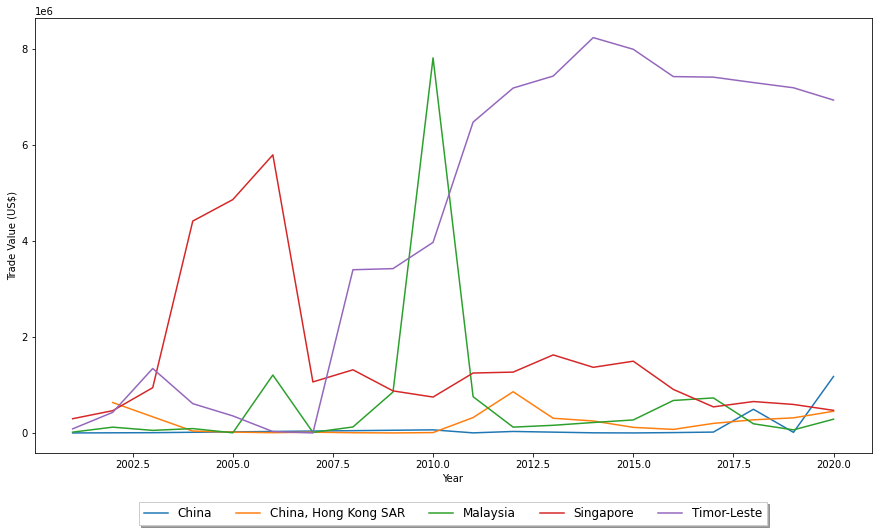

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

sns.lineplot(data=df_agg, x='Year', y='Trade Value (US$)', hue='Partner')

plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=False, shadow=True, ncol=5,fontsize=12)
plt.grid(False)
plt.yscale('linear')

ax = plt.gca()
#ax.axes.xaxis.set_visible(False)
#ax.axes.yaxis.set_visible(False)

plt.savefig('ekspor pasta.svg', transparent=True)

plt.show()